In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# choose the attributes which higer feature importances
game_info_df=game_info_df[['average', 'yearpublished', 'maxplayers','maxplaytime', 'minage', 
       'usersrated', 'stddev', 'avgweight','numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays',  'weblink']].copy()
# drop the null rows
game_info_df.dropna(inplace=True)
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.head()

,average,yearpublished,maxplayers,maxplaytime,minage,usersrated,stddev,avgweight,numweights,numgeeklists,numtrading,numwanting,numcomments,siteviews,numplays,weblink
0,8.77503,2017,4,120,14,44354,1.62720,3.8660,1910,4649,535,1374,8021,10583753,368134,40
1,8.60721,2015,4,60,13,43007,1.56641,2.8413,1172,3978,310,850,6552,3385064,238259,70
2,8.66981,2018,4,120,14,21618,1.24895,3.9065,1037,1630,102,1477,3303,1816252,54092,23
3,8.42870,2016,5,120,12,68412,1.38204,3.2395,2798,7276,453,2085,10034,6059031,393651,71
4,8.68957,2017,6,480,14,14385,1.59635,4.2333,673,1010,98,979,2206,2267902,21263,23


In [3]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,26996.0,6.162709,1.134454,1.0,5.527213,6.264495,6.924685,10.0
yearpublished,26996.0,1972.106349,246.196859,-3500.0,1992.000000,2005.000000,2015.000000,2022.0
maxplayers,26996.0,5.950733,69.806799,1.0,4.000000,4.000000,6.000000,11299.0
maxplaytime,26996.0,87.146651,475.289749,1.0,30.000000,45.000000,90.000000,60000.0
minage,26996.0,9.141243,3.954428,0.0,8.000000,10.000000,12.000000,25.0
usersrated,26996.0,668.597644,3173.892091,1.0,30.000000,76.000000,264.000000,104891.0
stddev,26996.0,1.465848,0.447295,0.0,1.279060,1.463315,1.677450,4.5
avgweight,26996.0,1.774809,1.001052,0.0,1.000000,1.754750,2.448300,5.0
numweights,26996.0,39.759705,183.938411,0.0,2.000000,6.000000,19.000000,7567.0
numgeeklists,26996.0,192.819195,594.318720,0.0,14.000000,39.000000,127.000000,15950.0


## Select features, Create Train Test Split, Scale the data

In [4]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape, y.shape

((26996, 15), (26996,))

In [5]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'maxplayers', 'maxplaytime', 'minage', 'usersrated',
       'stddev', 'avgweight', 'numweights', 'numgeeklists', 'numtrading',
       'numwanting', 'numcomments', 'siteviews', 'numplays', 'weblink'],
      dtype='object')

In [6]:
# Create a Train Test Split (20/80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((5399, 15), (5399,))

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Perform feature selection

In [8]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.94429
Testing Data Score: 0.57076


In [9]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_feature_importance

[(0.32820133056867545, 'numwanting'),
 (0.1319294608212614, 'yearpublished'),
 (0.12149452334357722, 'avgweight'),
 (0.07317425625421901, 'stddev'),
 (0.04888696668384064, 'siteviews'),
 (0.04544568730900388, 'numplays'),
 (0.04389898577963396, 'numgeeklists'),
 (0.04198273829493955, 'numtrading'),
 (0.036474256641551434, 'maxplaytime'),
 (0.027395432950048412, 'usersrated'),
 (0.02716748911824168, 'numcomments'),
 (0.025828183621952498, 'minage'),
 (0.02208658071209725, 'maxplayers'),
 (0.013290934445271463, 'weblink'),
 (0.012743173455686171, 'numweights')]

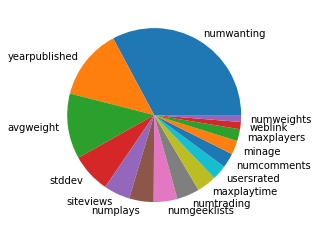

In [10]:
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance])
plt.show()

In [11]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 1.00000
Testing Data Score: 0.16597


In [12]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
dtr_feature_importance

[(0.3220217900811085, 'numwanting'),
 (0.13014479215426078, 'yearpublished'),
 (0.12495194795316844, 'avgweight'),
 (0.07477083783423395, 'stddev'),
 (0.05628827135052128, 'siteviews'),
 (0.04294890115022009, 'numtrading'),
 (0.03910703796763601, 'numplays'),
 (0.038848029578895785, 'numgeeklists'),
 (0.03738672720051707, 'maxplaytime'),
 (0.031979156596409666, 'minage'),
 (0.026897171475306014, 'numcomments'),
 (0.024689764162842694, 'usersrated'),
 (0.020298804489948266, 'maxplayers'),
 (0.01797828236928401, 'weblink'),
 (0.011688485635647216, 'numweights')]

<ipython-input-13-9cbc194fdd8d>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance])


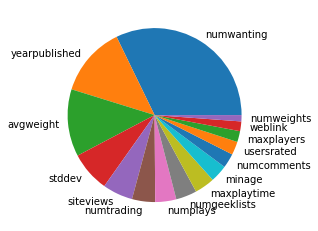

In [13]:
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance])
plt.show()

k: 1, Train/Test Score: 1.000/-0.149
k: 3, Train/Test Score: 0.621/0.216
k: 5, Train/Test Score: 0.543/0.287
k: 7, Train/Test Score: 0.517/0.312
k: 9, Train/Test Score: 0.494/0.330
k: 11, Train/Test Score: 0.480/0.341
k: 13, Train/Test Score: 0.469/0.346
k: 15, Train/Test Score: 0.460/0.350
k: 17, Train/Test Score: 0.451/0.353
k: 19, Train/Test Score: 0.443/0.356
k: 21, Train/Test Score: 0.437/0.357
k: 23, Train/Test Score: 0.431/0.357
k: 25, Train/Test Score: 0.428/0.357
k: 27, Train/Test Score: 0.424/0.357
k: 29, Train/Test Score: 0.422/0.357


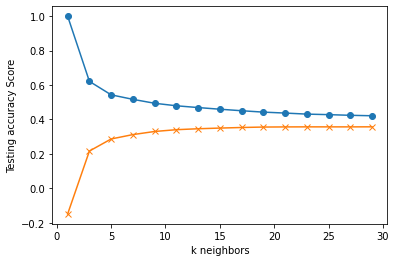

In [14]:
from sklearn.neighbors import KNeighborsRegressor
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    train_score = knr.score(X_train_scaled, y_train)
    test_score = knr.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()